<a href="https://colab.research.google.com/github/Dobarri/pytorch/blob/main/pytorch_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

print(torch.stack([x,y,z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


stack과 다르게 concatenate는 dim을 지정

In [ ]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat([a,b], dim=0)

print(c)
print(c.size())

tensor([[[[-0.0906, -0.7811, -1.1955],
          [-2.6412, -0.7032,  0.1091],
          [ 1.4105, -1.0893,  0.5444]]],


        [[[-1.5216,  1.3988, -0.0891],
          [-0.5576,  1.0745,  0.2655],
          [-1.0393,  0.2650, -1.7033]]]])
torch.Size([2, 1, 3, 3])


In [ ]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat([a,b], dim=0)

print(c)
print(c.size())

tensor([[[ 1.1110, -1.4390, -0.8267],
         [-1.6839, -1.6244,  0.3087],
         [ 0.6521,  0.4512,  1.7290]],

        [[ 0.4072,  0.9838,  0.2045],
         [-0.2229, -0.4146,  0.2252],
         [-0.4326, -0.2773,  1.7083]]])
torch.Size([2, 3, 3])


#chuch 
: 텐서 여러 개로 나눌 때 사용
-> 나누는 chuch갯수 입력

In [ ]:
tensor = torch.rand(3,6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.0477, 0.0187, 0.3973, 0.7655, 0.9494, 0.9011],
        [0.9516, 0.4570, 0.9475, 0.2643, 0.4388, 0.1807],
        [0.0061, 0.9956, 0.0488, 0.1982, 0.2434, 0.9283]])
tensor([[0.0477, 0.0187],
        [0.9516, 0.4570],
        [0.0061, 0.9956]])
tensor([[0.3973, 0.7655],
        [0.9475, 0.2643],
        [0.0488, 0.1982]])
tensor([[0.9494, 0.9011],
        [0.4388, 0.1807],
        [0.2434, 0.9283]])


#split
: chunk와 동일하지만 조금 다름. 
-> 하나 tensor당 크기 얼마인지 입력

In [ ]:
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.5005, 0.5357, 0.6661, 0.7661, 0.1166, 0.4481],
        [0.3908, 0.7181, 0.0305, 0.7657, 0.3710, 0.5917],
        [0.3375, 0.5833, 0.0749, 0.6933, 0.6485, 0.2527]])
tensor([[0.5005, 0.5357, 0.6661],
        [0.3908, 0.7181, 0.0305],
        [0.3375, 0.5833, 0.0749]])
tensor([[0.7661, 0.1166, 0.4481],
        [0.7657, 0.3710, 0.5917],
        [0.6933, 0.6485, 0.2527]])


torch <-> numpy

In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


tensor가 cpu상에 있으면 ndarray는 메모리공간을 공유하므로 둘 다 변함

In [ ]:
a.add_(1)

print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [ ]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)

print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


#cuda torch

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([2.2766])
2.2766053676605225
torch.float32


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y

print(device)
print(z)
print(z.to("cpu",torch.double))

cpu
tensor([3.2766])
tensor([3.2766], dtype=torch.float64)


#autograd
: tensor의 모든 연산에 대해 자동 미분 제공 -> 코드 작성에 따라 역전파 정의

- grad : data가 거쳐온 Layer에 대한 미분값 저장
- grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해 backprop했는지)
- requires_grad : True로 하면 해당 tensor에서 이루어지는 모든 연산 추적
- 게산 완료 후, .backward()호출하면 자동으로 gradient계산
- 기록 중단하려면 .detach()호출해서 연산기록으로부터 분리
- 기록 추적 방지하려면 코드블럭을 with torch.no_grad()로 감쌈 -> gradient는 필요없지만 requires_grad=True로 되어 학습 가능한 매개변수를 갖는 모델 평가할 때 유용
- Function 클래스 매우 중요!

In [ ]:
import torch

In [ ]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
print(y.grad_fn)

In [ ]:
z = y * y * 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


In [ ]:
a = torch.randn(3,3)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


#gradient

In [ ]:
out.backward()

In [ ]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [ ]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000 :
    y = y * 2

print(y)

tensor([1269.6119,   33.1880,  436.1347], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad() :
    print((x ** 2).requires_grad)

True
True
False


detach() : content는 같지만 require_grad가 다른 새로운 tensor가져올 때

In [ ]:
print(x.requires_grad)

y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


In [ ]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print("a.data:", a.data)
print("a.gard:", a.grad)
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.gard: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [ ]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print("a.data:", a.data)
print("a.gard:", a.grad)
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.gard: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [ ]:
print("b.data:", b.data)
print("b.gard:", b.grad)
print("b.grad_fn:", b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.gard: None
b.grad_fn: <AddBackward0 object at 0x7f3f2355d6d0>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


In [ ]:
print("c.data:", c.data)
print("c.gard:", c.grad)
print("c.grad_fn:", c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.gard: None
c.grad_fn: <PowBackward0 object at 0x7f3f236e7690>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


In [ ]:
print("out.data:", out.data)
print("out.gard:", out.grad)
print("out.grad_fn:", out.grad_fn)

out.data: tensor(36.)
out.gard: None
out.grad_fn: <SumBackward0 object at 0x7f3f23593b90>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


grad넣어서 backward

In [ ]:
x = torch.ones(3, requires_grad=True)
y = (x ** 2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [ ]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [ ]:
print("x.data:", x.data)
print("x.gard:", x.grad)
print("x.grad_fn:", x.grad_fn)

x.data: tensor([1., 1., 1.])
x.gard: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [ ]:
print("y.data:", y.data)
print("y.gard:", y.grad)
print("y.grad_fn:", y.grad_fn)

y.data: tensor([1., 1., 1.])
y.gard: None
y.grad_fn: <PowBackward0 object at 0x7f3f23684810>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


In [ ]:
print("z.data:", z.data)
print("z.gard:", z.grad)
print("z.grad_fn:", z.grad_fn)

z.data: tensor([2., 2., 2.])
z.gard: None
z.grad_fn: <AddBackward0 object at 0x7f3f23684ed0>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


#네트워크 구성

#nn & nn.functional

- torch.nn : attribute를 활용해 state를 저장, 활용 -> weight값 직접 선언 안 함
- torch.nn.functional : instance화 시킬 필요 없이 사용 가능 -> weight직접 선언해서 인자로 넣어줘야함

In [ ]:
import torch
import torch.nn as nn

In [ ]:
m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(16, 33, (3,5), stride=(2, 1), padding=(4,2))

m = nn.Conv2d(16, 33, (3,5), stride=(2, 1), padding=(4,2), dilation=(3,1))

input = torch.randn(20, 16, 50, 100)
output = m(input)

In [ ]:
output.shape

torch.Size([20, 33, 26, 100])

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
filters = torch.randn(8, 4, 3, 3)

In [ ]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

#Torchvision

- transforms : 전치리할 때 사용
- transforms에서 제공하는 Class이외에 따로 클래스를 만들어 전처리 단계 진행

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

- DataLoader의 인자로 들어갈 TRANSFORM미리 정의 할 수 있음
- compose를 통해 리스트 안에 순서대로 전처리 진행
- ToTensor()하는 이유 : Torchvision이 PIL image형태로만 입력받기때문에 tensor형으로 변환하기 위해

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])

#utils.data
dataset에 다양한 데이터셋 존재
데이터 어떻게 load할 것인지 정해줄 수 있음

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [ ]:
trainset = torchvision.datasets.MNIST(root='/content/',
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='/content/',
                                      train=False,
                                      download=True,
                                      transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

batch size만큼 데이터를 하나씩 가져온다

#torch에서는 CHANNEl이 앞에 온다!

In [ ]:
 dataiter = iter(train_loader)
 images, labels = dataiter.next()
 images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

#시각화

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [ ]:
image = torch_image.numpy()
image.shape

(28, 28)

In [ ]:
label = labels[0].numpy()
label.shape

()

()로 나왔으니 스칼라 값이라는 뜻

In [ ]:
label

array(0)

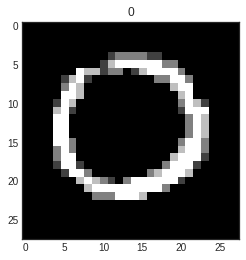

In [ ]:
plt.title(label)
plt.imshow(image,'gray')
plt.show()

#Layers

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

- in_channels : channel 수
- out_channels : output 채널 수
- Kernel_size : filter size

tensorflow, keras와 다르게 layer의 input인자에도 값을 집어 넣어줘야한다

In [ ]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

weight 확인

In [ ]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

weight는 detach()로 꺼내줘야 numpy()변환 가능

In [ ]:
weight = weight.detach()

In [ ]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

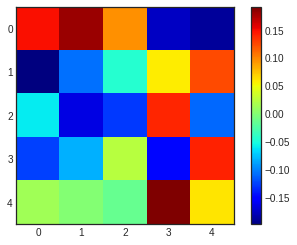

In [ ]:
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

In [ ]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [ ]:
input_image = torch.unsqueeze(images[0], dim=0)

In [ ]:
output_data = layer(input_image)

In [ ]:
output = output_data.data

In [ ]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

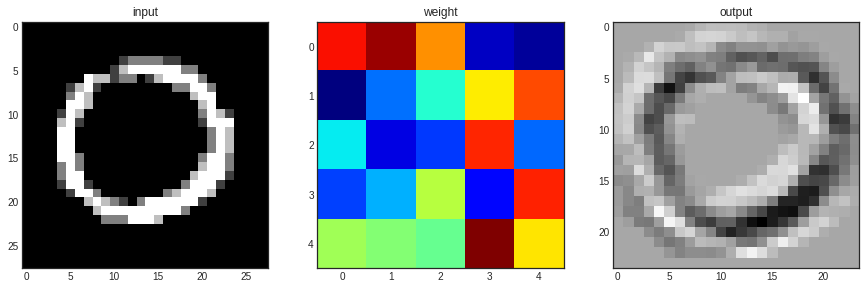

In [ ]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('input')
plt.imshow(image,'gray')

plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0,0,:,:], 'jet')

plt.subplot(133)
plt.title('output')
plt.imshow(output_arr[0,0,:,:], 'gray')

plt.show()

#pooling

In [ ]:
image.shape

(28, 28)

In [ ]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

MaxPool layer는 weight가 없기때문에 바로 NUMPY()변환 가능

In [ ]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

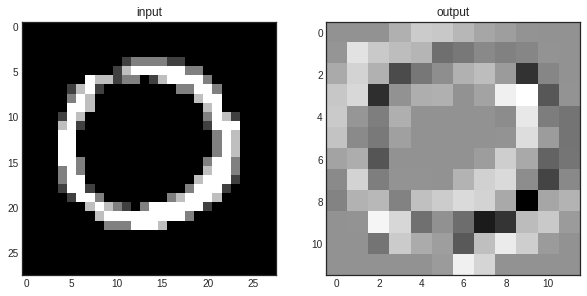

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title('input')
plt.imshow(image,'gray')

plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0,0,:,:], 'gray')

plt.show()

#Linear

1d만 가능
.view()로 1d로 펼쳐줘야한다

In [ ]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [ ]:
flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [ ]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [ ]:
lin

tensor([[-0.8371, -0.1725,  0.7385, -0.8669, -0.9906, -0.2815,  0.1877,  0.0987,
         -0.2494,  0.5297]], grad_fn=<AddmmBackward0>)

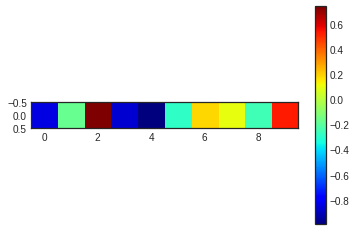

In [ ]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

#softmax

In [ ]:
with torch.no_grad() :
    flatten = image.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [ ]:
softmax

tensor([[0.0825, 0.1990, 0.0540, 0.0286, 0.1276, 0.1051, 0.0485, 0.1146, 0.1815,
         0.0586]])

In [ ]:
np.sum(softmax.numpy())

1.0

#F.relu

nn.ReLU로도 사용 가능

In [ ]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

#optimizer

model의 parameter 업데이트

.zero_grad()로 초기화
.step()로 업데이트

In [ ]:
import torch.optim as optim

In [ ]:
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
# optimizer = optim.SGD(model.parameters(), lr=0.001)